In [92]:
# Example Fetching data
import baostock as bs
import pandas as pd
import numpy as np
import tushare as ts
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns

In [3]:
lg = bs.login()
print(lg.error_code)
print(lg.error_msg)

rs = bs.query_history_k_data("sh.600519",
    "date, code, open, high, low, close, volume, amount, adjustflag, turn, tradestatus, pctChg, peTTM, psTTM, pcfNcfTTM, pbMRQ, isST",
    start_date='2020-01-01', end_date='2020-10-02',
    frequency="d", adjustflag="2")
print(rs.error_code)
print(rs.error_msg)


result_list = []
while (rs.error_code == '0') & rs.next():
    result_list.append(rs.get_row_data())
result = pd.DataFrame(result_list, columns=rs.fields)

print(result)

# bs.logout()

login success!
0
success
0
success
           date       code             open             high              low  \
0    2020-01-02  sh.600519  1114.9794960000  1131.8425724200  1103.1180120000   
1    2020-01-03  sh.600519  1104.1064690000  1104.1064690000  1064.4693433000   
2    2020-01-06  sh.600519  1058.4990630200  1080.2846553000  1054.9801561000   
3    2020-01-07  sh.600519  1065.0624175000  1086.3142430000  1063.9751148000   
4    2020-01-08  sh.600519  1072.5252678500  1082.8546435000  1070.0837790600   
..          ...        ...              ...              ...              ...   
178  2020-09-24  sh.600519  1635.9700000000  1658.8800000000  1626.8000000000   
179  2020-09-25  sh.600519  1630.0000000000  1650.0000000000  1625.0000000000   
180  2020-09-28  sh.600519  1635.1900000000  1668.5000000000  1635.1900000000   
181  2020-09-29  sh.600519  1669.3300000000  1669.4000000000  1652.3000000000   
182  2020-09-30  sh.600519  1660.0000000000  1691.9000000000  1660.0000000

In [4]:
result.head(5)

date       code             open             high              low  \
0  2020-01-02  sh.600519  1114.9794960000  1131.8425724200  1103.1180120000   
1  2020-01-03  sh.600519  1104.1064690000  1104.1064690000  1064.4693433000   
2  2020-01-06  sh.600519  1058.4990630200  1080.2846553000  1054.9801561000   
3  2020-01-07  sh.600519  1065.0624175000  1086.3142430000  1063.9751148000   
4  2020-01-08  sh.600519  1072.5252678500  1082.8546435000  1070.0837790600   

             close    volume            amount adjustflag      turn  \
0  1116.9564100000  14809916  16696837095.0000          2  1.178900   
1  1066.1101819200  13031878  14266380596.0000          2  1.037400   
2  1065.5467614300   6341478   6853917601.0000          2  0.504800   
3  1081.8958402100   4785359   5220697068.0000          2  0.380900   
4  1075.5795999800   2500825   2720371915.0000          2  0.199100   

  tradestatus     pctChg      peTTM      psTTM  pcfNcfTTM      pbMRQ isST  
0           1  -4.480100  34.685547  16.556143  76.567282  11.332618    0  
1           1  -4.552200  33.106587  15.802472  73.081777  10.816733    0  
2           1  -0.052900  33.089091  15.794121  73.043154  10.811017    0  
3           1   1.534300  33.596789  16.036456  74.163882  10.976894    0  
4           1  -0.583800  33.400647  15.942833  73.730905  10.912810    0

In [5]:
# get all stocks EOD data
eod_info = ts.get_today_all()
# eod_info.to_csv("20201002_all_eod_info.csv")
pd.set_option('display.max_rows', None)
eod_info

[Getting data:]###########################################

code    name  changepercent     trade      open      high       low  \
0     688981    中芯国际         -0.878    49.650    50.250    50.500    49.500   
1     688600    皖仪科技         -0.228    21.860    22.010    22.180    21.600   
2     688599    天合光能          2.503    16.380    15.980    16.840    15.960   
3     688598    金博股份         -0.721   100.470   102.000   102.390    99.510   
4     688596    正帆科技         -2.313    23.230    23.850    23.980    23.220   
5     688595    芯海科技        -11.418    61.830    67.600    68.660    61.700   
6     688589     力合微         -2.584    49.000    50.400    50.550    48.690   
7     688588    凌志软件         -0.962    30.880    31.180    31.680    30.860   
8     688586    江航装备          0.273    33.100    32.930    33.680    32.410   
9     688585    上纬新材         -1.919    14.310    14.000    15.050    13.880   
10    688580    伟思医疗         -0.943   162.850   164.400   164.960   160.000   
11    688579    山大地纬          0.105    19.020    19.030    19.280    18.880   
12    688577    浙海德曼         -1.728    47.770    48.410    49.490    47.760   
13    688569    铁科轨道         -1.307    23.400    23.750    23.950    23.400   
14    688568    中科星图         -1.315    59.300    60.280    60.590    59.000   
15    688567    孚能科技          0.426    25.950    25.800    26.380    25.520   
16    688566     吉贝尔         -0.370    32.340    32.310    33.010    32.310   
17    688561     奇安信          1.186    98.960    95.000   100.800    95.000   
18    688559     海目星         -1.392    24.090    24.490    25.080    23.820   
19    688558    国盛智科          0.338    32.650    32.540    33.130    32.400   
20    688556    高测股份         -0.337    29.600    29.600    30.440    29.200   
21    688555    泽达易盛         -0.376    50.400    50.840    51.850    50.200   
22    688551     科威尔         -0.900    38.550    38.910    39.400    38.550   
23    688550    瑞联新材         -3.676   101.670   105.640   106.800   101.380   
24    688536     思瑞浦          3.252   254.000   245.900   262.500   241.000   
25    688528    秦川物联         -1.129    21.010    21.320    21.420    20.970   
26    688526    科前生物         -2.074    32.100    32.850    33.270    31.770   
27    688521    芯原股份         -2.013    92.500    94.790    95.240    91.950   
28    688520    神州细胞          2.935    60.320    59.030    62.200    59.030   
29    688519    南亚新材          0.203    34.590    34.490    34.920    34.460   
30    688518    联赢激光         -0.797    18.670    18.830    19.130    18.620   
31    688516     奥特维          5.455    78.680    73.600    78.780    73.420   
32    688513    苑东生物         -0.039    51.600    52.000    52.160    51.330   
33    688508     芯朋微         -1.805   101.710   104.750   104.900   101.520   
34    688505    复旦张江         -0.438    22.710    22.830    23.350    22.710   
35    688500    慧辰资讯         -1.611    52.520    53.380    53.650    52.100   
36    688488    艾迪药业         -1.010    28.410    28.980    28.980    28.010   
37    688466    金科环境          0.000    34.970    34.990    35.800    34.770   
38    688418    震有科技         -0.117    34.090    34.190    34.550    34.000   
39    688408     中信博          2.698   108.500   106.270   114.990   104.550   
40    688399    硕世生物          5.697   259.380   242.300   261.360   242.280   
41    688398    赛特新材          1.352    51.710    51.500    52.920    50.920   
42    688396     华润微         -0.514    56.160    56.430    56.830    55.570   
43    688393     安必平         -0.857    42.810    43.570    43.570    42.810   
44    688390     固德威          4.713   153.300   147.800   161.770   145.490   
45    688389    普门科技          1.434    27.590    27.170    28.350    27.170   
46    688388    嘉元科技          0.984    49.250    49.480    50.000    48.770   
47    688379    华光新材         -1.884    28.650    29.400    29.500    28.600   
48    688378     奥来德         -1.834    65.820    67.250    67.300    65.300   
49    688377     迪威尔         -0.080    25.110    25.030   

# get stock info for grouping

In [171]:
# get all stocks basic info data
stk_info = ts.get_stock_basics()
# stk_info.to_csv("all_stock_info.csv")

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [172]:
# split stock by pe value
stk_info25 = stk_info.loc[(stk_info['pe'] > 0) & (stk_info['pe'] <= 25)]  # 926 stocks
# remove ST stocks
stk_info25 = stk_info25[~stk_info25['name'].str.contains("ST")]  # 904 stocks

stk_info50 = stk_info.loc[(stk_info['pe'] > 25) & (stk_info['pe'] <= 50)]  # 940 stocks
display(stk_info25.shape)
display(stk_info50.shape)

(904, 22)

(940, 22)

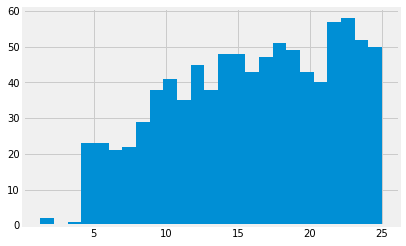

In [161]:
stk_info25.groupby('industry')['name'].count()
plt.hist(stk_info25['pe'], bins = 25)
plt.show()

In [173]:
stk_info25['industry'] = pd.factorize(stk_info25.industry)[0]  # convert categorical to numerical
# stk_info25['code'] = stk_info25.index
stk_info25 = stk_info25.drop(['name', 'area', 'outstanding', 'totals', 'totalAssets', 'liquidAssets', 'fixedAssets', 'reserved'], axis = 1)
# stk_info25 = stk_info25.reset_index(drop=True)
stk_info25

industry     pe  reservedPerShare    esp   bvps     pb  timeToMarket  \
code                                                                           
003011         0  21.77              2.08  1.279  15.36   3.62      20200930   
605099         1  24.68              0.16  0.450   4.04   5.51      20200930   
601615         2  22.37              2.56  0.390   5.17   3.27      20190123   
300129         3  23.15              0.99  0.160   3.28   2.26      20101019   
300118         4  22.15              5.80  0.383   9.53   1.78      20100902   
000591         5  11.51              2.23  0.201   4.52   1.02      19960208   
002226         6  21.13              2.62  0.169   4.88   1.46      20080506   
300660         3  21.11              5.46  0.514   9.07   2.39      20170602   
688298         7  18.39              4.58  4.366  10.85  14.80      20200205   
603063         3  19.20              2.35  0.289   6.08   1.83      20170728   
300320         8  24.45              0.60  0.131   2.89   2.22      20120601   
688399         7  24.71             13.73  5.248  21.16  12.26      20191205   
603319         9  23.27              1.82  0.817   8.19   4.65      20161130   
603218        10  23.07              0.78  0.550   4.93   4.59      20161228   
000791        11  12.64              2.59  0.142   4.75   0.76      19971014   
603301         7   6.89              3.22  5.040  11.13   6.16      20180412   
002531         3  12.17              0.96  0.305   3.47   2.14      20101231   
300031        12  18.49              2.42  0.610   7.06   3.11      20091225   
002452         3  15.25              0.47  0.222   2.53   2.68      20100720   
300206         7  13.74              0.66  0.813   2.86   7.81      20110421   
000951        13  15.18              0.64  1.085  10.95   3.01      19991125   
002978        14  20.29              2.56  0.950   9.41   3.80      20200417   
300286        15  24.29              0.45  0.330   3.47   4.39      20120113   
000955        16  14.11              0.91  0.301   1.44   5.89      19991209   
002164         3   1.31              2.49  1.640   1.06   5.18      20070823   
000012        17  22.04              0.19  0.127   3.15   1.78      19920228   
300677         7   8.72              4.57  9.300  16.55   9.11      20170721   
600273         6  14.00              1.73  0.400   5.09   2.13      20030627   
002097        10  12.03              2.16  0.367   4.92   1.79      20061222   
002487        18  15.55              1.46  0.290   3.90   2.30      20101015   
002145         6  23.00              0.42  0.170   2.20   2.50      20070803   
600061        19  14.10              4.88  0.543   9.61   1.59      19970519   
002126         9  24.28              1.24  0.257   4.90   2.55      20070418   
603686        20  23.79              2.12  0.470   6.28   3.56      20150126   
603166         9  23.27              1.78  0.150   3.62   1.92      20141127   
300690         3  17.37              5.11  1.150   9.78   4.02      20170808   
601016         5  18.61              0.24  0.090   1.81   1.53      20140929   
600163         5  22.39              1.40  0.083   1.89   1.97      19980602   
600173        21  13.66              0.03  0.187   3.98   1.28      19990415   
002897        22  23.24              3.01  0.753   7.47   4.68      20170907   
601908         5  22.81              1.45  0.115   3.70   1.42      20110908   
603985         2  15.34              2.35  0.872   6.26   4.27      20170505   
603181         6  24.57              1.27  0.355   4.13   4.23      20170824   
002726        23  17.13              0.22  0.305   2.60   4.01      20140626   
601038        24  17.01              2.13  0.328   4.45   2.51      20120808   
603617        25  24.36              0.65  0.251   3.13   3.90      20170703   
603699        25  22.25              1.06  0.345   3.48   4.41      20140117   
002893        26  12.37              0.78  0.407   3.26   3.08      20170915   
600685  

In [174]:
# clustering stocks

labels = stk_info25.index
features = stk_info25.reset_index(drop=True)

# scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means

In [175]:
kmeans = KMeans(init='k-means++', n_clusters=14, n_init=10, max_iter=300, random_state=52)
y = kmeans.fit_predict(scaled_features)
labels_result = pd.DataFrame(kmeans.labels_)
labels_result

0
0     7
1     1
2     1
3     1
4     7
5     3
6     1
7     7
8    10
9     1
10    1
11   10
12    1
13    1
14    3
15   10
16    1
17    8
18    1
19    6
20    0
21    7
22    1
23   11
24    6
25    3
26   10
27    3
28    3
29    1
30    1
31    9
32    1
33    1
34    1
35    7
36    1
37    8
38    3
39    6
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    0
49    0
50    4
51    3
52    3
53    1
54    1
55    4
56    0
57    0
58    1
59    7
60    1
61    1
62    8
63    0
64    1
65    3
66    7
67    3
68    6
69    1
70    1
71    1
72    8
73    1
74    3
75   13
76    1
77    1
78    6
79    1
80    3
81    6
82    3
83    7
84    1
85   13
86    1
87    7
88    0
89    3
90    0
91    3
92    0
93    1
94    8
95    1
96    8
97    0
98    0
99    6
100   0
101   7
102   1
103   0
104   7
105   3
106   3
107   1
108   1
109   1
110  12
111   1
112   1
113   8
114   6
115   8
116  12
117   1
118   1
119   7
120   1
121   7
122   8
123   7
124  10
125   6
126   3
127   3
128   8
129   1
130   3
131   3
132   3
133   6
134   7
135   1
136   7
137   8
138   4
139   7
140   8
141   0
142   3
143   5
144  12
145   1
146   0
147   6
148   8
149   1
150   4
151   4
152   5
153   7
154  12
155   4
156  12
157   7
158   1
159   8
160   3
161   3
162   8
163   1
164  12
165   1
166  12
167  12
168   3
169  13
170   8
171   0
172   3
173   8
174  12
175   8
176   7
177   0
178   8
179  12
180   3
181   6
182   1
183   3
184  12
185   1
186   6
187   3
188   8
189   7
190   0
191   1
192   1
193   1
194   8
195   8
196   1
197   3
198  12
199   1
200   1
201   3
202   3
203   1
204  12
205   1
206   6
207   6
208   8
209   0
210   8
211   0
212   8
213   7
214   3
215   8
216   1
217   0
218  12
219   0
220   3
221   1
222   6
223   1
224   7
225  13
226   3
227   2
228  12
229   0
230   0
231  12
232  12
233   7
234   1
235   8
236   0
237   1
238   7
239   3
240   2
241   0
242   8
243   3
244   0
245   3
246   1
247   3
248   7
249   0
250   1
251   3
252  12
253  12
254   1
255   1
256  12
257   1
258   1
259   0
260   7
261   4
262   3
263  13
264   3
265   3
266   0
267  12
268  12
269   0
270   3
271   0
272  12
273   8
274   2
275  12
276  12
277  12
278   4
279   2
280   1
281   7
282   1
283   8
284   1
285   7
286  12
287  11
288   1
289   7
290  12
291  12
292  12
293   8
294   3
295   1
296   3
297   3
298   3
299   4
300  12
301   0
302   7
303   1
304   6
305  13
306   0
307   6
308   1
309   1
310   3
311   6
312   3
313   7
314   0
315   1
316   0
317   0
318   3
319  12
320   3
321   3
322   0
323   1
324   8
325   3
326   3
327   1
328   1
329   0
330   3
331   1
332   0
333  12
334   4
335  12
336   8
337   4
338  12
339   1
340   1
341   1
342  13
343   3
344  12
345  12
346   1
347  13
348   8
349   7
350  12
351   3
352   7
353   8
354  12
355   0
356   3
357   3
358   1
359   7
360   1
361   1
362   3
363   6
364   7
365   3
366  12
367   5
368   1
369   3
370   1
371   0
372   3
373  12
374  12
375   1
376   7
377  12
378   4
379  13
380   0
381  12
382  12
383   0
384  12
385  12
386  12
387   5
388   3
389   8
390   1
391   1
392   7
393   7
394   1
395  12
396   0
397   0
398  12
399   3
400   7
401   7
402   3
403  12
404   0
405   4
406   8
407   4
408   8
409   3
410   1
411   3
412  12
413  12
414  13
415   3
416   0
417  12
418  12
419   3
420   7
421   7
422  12
423   1
424   7
425   3
426  12
427  12
428   8
429   3
430   9
431   1
432  12
433   8
434   1
435   1
436   7
437   3
438   7
439   1
440  12
441   0
442   1
443  12
444   0
445   3
446  12
447   1
448   3
449  12
450   0
451   1
452   1
453   0
454   3
455   7
456   3
457   8
458  12
459  12
460   1
461   7
462   1
463   8
464  12
465   0
466   3
467   8
468   3
469   8
470   1
471  12
472   1
473   3
474   0
475   4
476  12
477   0
478   4
479   8
480   1
481   1
482   3
483   3
484   1
485   6
486  12
487  13
488   7
489   3
490   1
491   8
492   8
493   4
494   3
495  12
496   0
497   8
498   0
499  1

In [177]:
labeledstock = pd.concat((features, labels_result),axis=1)
labeledstock = labeledstock.rename({0:'labels_result'},axis=1)

labeledstock.head()


industry     pe  reservedPerShare    esp   bvps    pb  timeToMarket   undp  \
0         0  21.77              2.08  1.279  15.36  3.62      20200930   2.80   
1         1  24.68              0.16  0.450   4.04  5.51      20200930   5.64   
2         2  22.37              2.56  0.390   5.17  3.27      20190123  20.48   
3         3  23.15              0.99  0.160   3.28  2.26      20101019   8.67   
4         4  22.15              5.80  0.383   9.53  1.78      20100902  25.11   

   perundp     rev  profit    gpr    npr  holders  labels_result  
0     3.82    0.00    0.00  31.24  16.34  36725.0              7  
1     1.41    0.00    0.00  35.96  22.42  44994.0              1  
2     1.46  107.24   58.95  21.74   6.38  42794.0              1  
3     1.21   24.55  115.41  24.10  10.08  41243.0              1  
4     2.79   26.25  -28.81  19.69   4.52  52422.0              7

In [178]:
labeledstock['index'] = labels
stk_info['index'] = stk_info.index
stk_keys = stk_info[['index', 'name', 'industry']].reset_index()
stk_keys 

fn_df = labeledstock.merge(stk_keys, how= 'left', on = 'index')
fn_df.to_csv("grouping_stock_result_2.csv")

## PCA

In [128]:
labels = stk_info25.index
features = stk_info25.reset_index(drop=True)

# scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca_stock0 = PCA(n_components=3)
pca_stock = pca_stock0.fit_transform(scaled_features)
pca_stock_df = pd.DataFrame(data = pca_stock, columns = ['PC1', 'PC2', 'PC3'])

In [129]:
print('Explained variation per principal component: {}'.format(pca_stock0.explained_variance_ratio_))  # 50% info explained

Explained variation per principal component: [0.21200145 0.17794083 0.10891128]


In [133]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
skips = math.floor(len(colors[5 : -5])/12)  # 12 is number of clusters
cluster_colors = colors[5 : -5 : skips] 


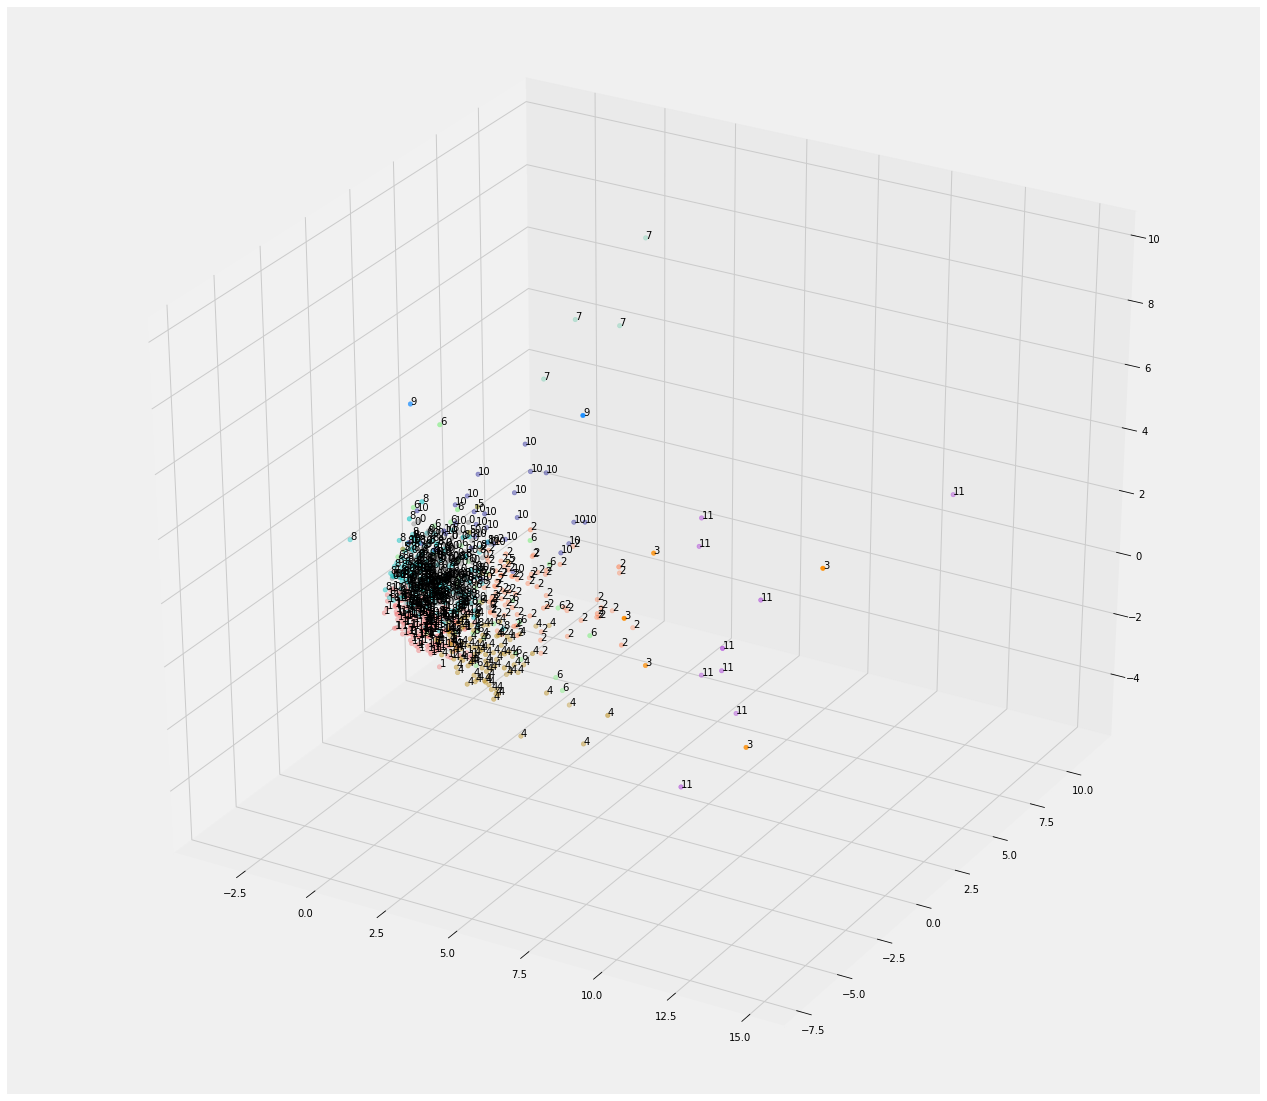

In [144]:
# 3D
# number of steps to taken generate n(clusters) colors  
%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize = (20, 20)) 
ax = fig.add_subplot(111, projection = '3d') 

ax.scatter(pca_stock_df['PC1'], pca_stock_df['PC2'], pca_stock_df['PC3'],  
           c = list(map(lambda label : cluster_colors[label], labeledstock['labels_result']))) 
   
str_labels = list(map(lambda label:'% s' % label, labeledstock['labels_result'])) 
   
list(map(lambda data1, data2, data3, str_label: ax.text(data1, data2, data3, s = str_label, size = 10, 
        zorder = 20, color = 'k'), pca_stock_df['PC1'], pca_stock_df['PC2'], pca_stock_df['PC3'], str_labels)) 

plt.show()

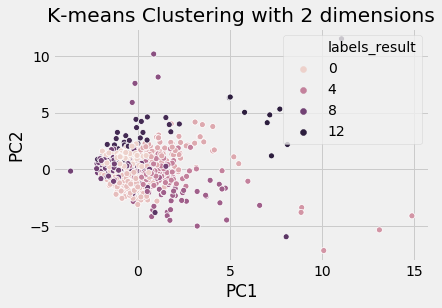

In [126]:
# 2D
sns.scatterplot(x="PC1", y="PC2", hue=labeledstock['labels_result'], data=pca_stock_df)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

C:\Users\Li.Mingxi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Li.Mingxi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


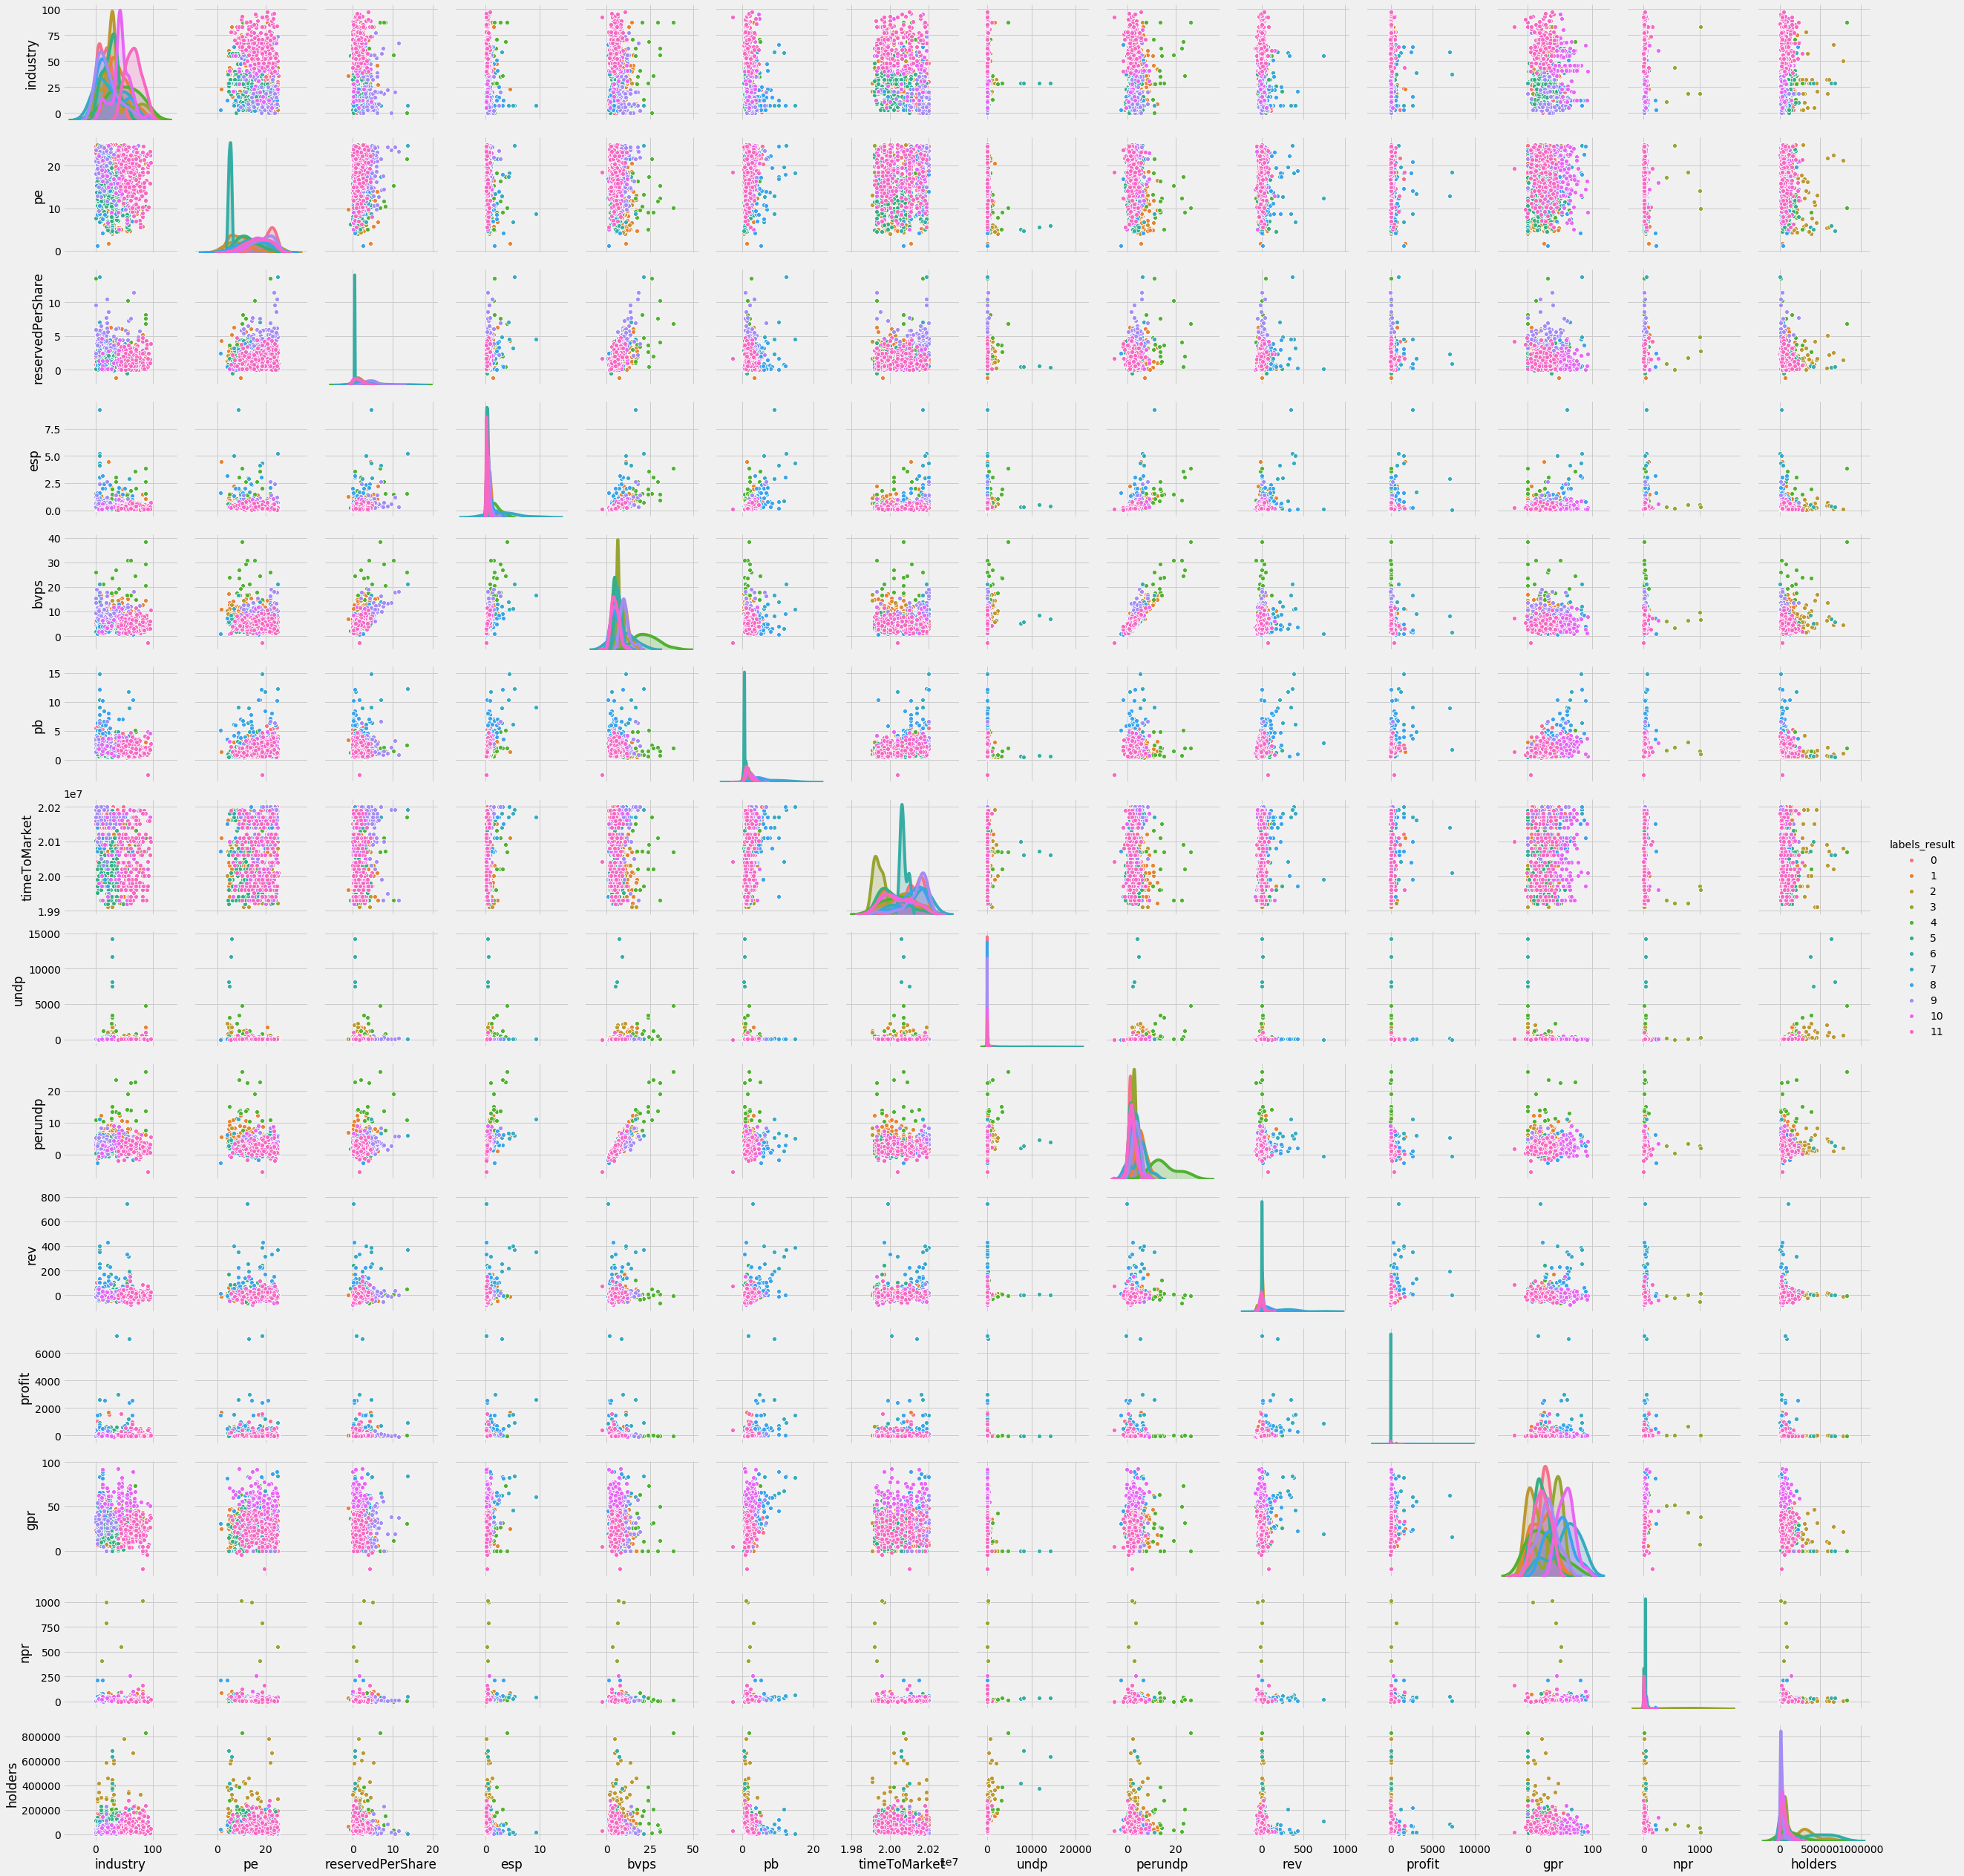

In [88]:
sns.pairplot(labeledstock, hue='labels_result')

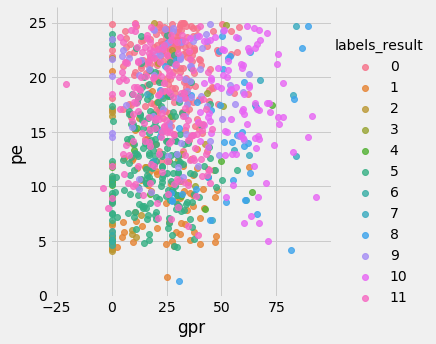

In [90]:
sns.lmplot(x='gpr',y='pe',data=labeledstock,hue='labels_result',fit_reg=False)

In [166]:
# The lowest SSE value
kmeans.inertia_

7765.130587142996

In [82]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-4.85481315e-01,  6.41414335e-01,  1.13131211e-01,
        -9.89040564e-02, -1.48383561e-01,  4.05655416e-01,
         6.82722231e-01, -1.56016039e-01, -2.09304215e-01,
         6.01424078e-02, -2.66656652e-02,  3.23133418e-01,
        -6.70207088e-02, -3.56798969e-01],
       [ 3.76675536e-01, -4.65108380e-01, -2.25844114e-01,
        -1.98239318e-01, -1.20955934e-01, -4.38096133e-01,
        -5.59209667e-01,  8.23405554e-02, -6.74944440e-02,
        -1.36878697e-01, -6.26547918e-02, -2.97225106e-01,
         3.52254508e-02,  2.58356809e-01],
       [-9.23292732e-04, -3.84647119e-01,  1.63682372e+00,
         3.25929605e+00,  2.79817528e+00,  1.46299095e+00,
         3.50966273e-01,  4.58549674e-01,  2.72463388e+00,
         1.06949656e+00,  9.87882551e-01,  5.51953729e-01,
         1.98713125e-01,  2.18336634e-01]])

In [176]:
# The number of iterations required to converge
kmeans.n_iter_

14

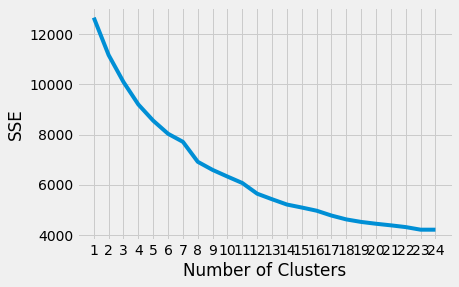

In [84]:
# choose the appropriate number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 25):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

# elbow plot
plt.style.use("fivethirtyeight")
plt.plot(range(1, 25), sse)
plt.xticks(range(1, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [85]:
# select the optimum cluster numbers
kl = KneeLocator(range(1, 25), sse, curve="convex", direction="decreasing")
kl.elbow

12